In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn import datasets

## Boost dataset (regression)

In [5]:
boston = datasets.load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [7]:
print(boston.DESCR[100: 1300])

tics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 

In [8]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


<Figure size 720x288 with 0 Axes>

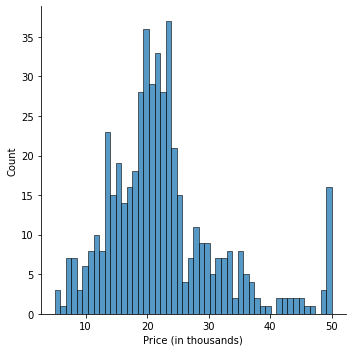

In [33]:
plt.figure(figsize=(10, 4))
sns.displot(boston.target, bins=50)

plt.xlabel('Price (in thousands)')
plt.ylabel('Count')
plt.tight_layout()

In [16]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
model = linear_regression.fit(boston.data, boston.target)

In [17]:
feature_weight_df = pd.DataFrame(list(zip(boston.feature_names, model.coef_)))
feature_weight_df.columns = ['Feature', 'Weight']
feature_weight_df

,Feature,Weight
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


In [19]:
import operator

first_predicted = sum(map(
    lambda pair: operator.mul(*pair),
    zip(model.coef_, boston.data[0])
))
first_predicted

-6.455645008073388

In [21]:
model.intercept_

36.4594883850901

In [22]:
first_predicted + model.intercept_

30.003843377016707

In [24]:
predicted = model.predict(boston.data)
predicted[: 10]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423,
       25.25628446, 23.00180827, 19.53598843, 11.52363685, 18.92026211])

In [26]:
prediction_ground_truth_df = pd.DataFrame(list(zip(predicted, boston.target)))
prediction_ground_truth_df.columns = ['Prediction', 'Ground truth']
prediction_ground_truth_df.head()

,Prediction,Ground truth
0,30.003843,24.0
1,25.025562,21.6
2,30.567597,34.7
3,28.607036,33.4
4,27.943524,36.2


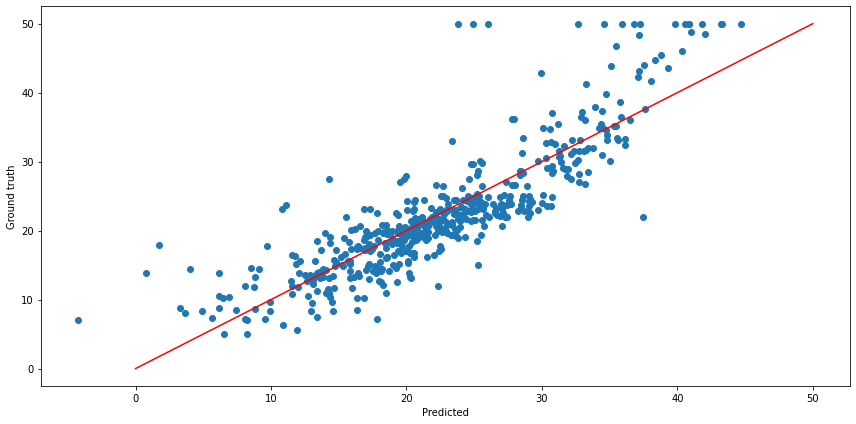

In [30]:
plt.figure(figsize=(12, 6))
plt.scatter(predicted, boston.target)
plt.xlabel('Predicted')
plt.ylabel('Ground truth')

plt.plot([0, 50], [0, 50], color='red')
plt.tight_layout()

## Breast Cancer dataset (classification)

In [35]:
cancer = datasets.load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [36]:
print(cancer.DESCR[:760])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline appr


In [37]:
cancer_df = pd.DataFrame(cancer.data)
cancer_df.columns = cancer.feature_names
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


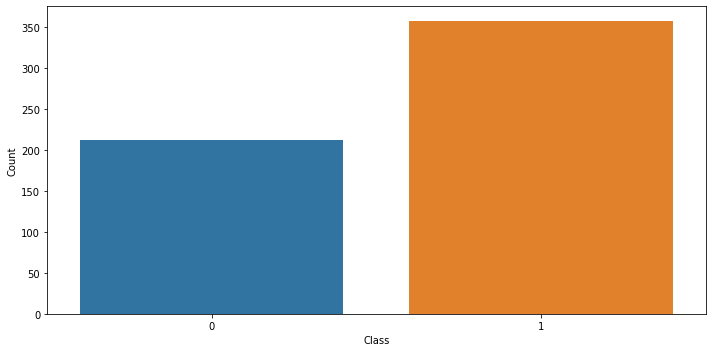

In [40]:
plt.figure(figsize=(10, 5))
sns.countplot(x=cancer.target)

plt.xlabel('Class')
plt.ylabel('Count')
plt.tight_layout()

In [43]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(max_iter=100000)
model = logistic_regression.fit(cancer.data, cancer.target)
model.coef_

array([[ 0.98735894,  0.17798582, -0.25754376,  0.02172603, -0.17620882,
        -0.21021813, -0.52235936, -0.29321491, -0.25881008, -0.0279606 ,
        -0.07045675,  1.27714189,  0.10537476, -0.10799179, -0.02521036,
         0.07371104, -0.02785075, -0.03766025, -0.03184127,  0.01510894,
         0.20221997, -0.43252195, -0.11027826, -0.01394916, -0.35440586,
        -0.66281627, -1.39840009, -0.60079677, -0.70162912, -0.08970572]])

In [45]:
prediction = model.predict(cancer.data)
prediction[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [47]:
prediction = model.predict_proba(cancer.data)
prediction[:10]

array([[1.00000000e+00, 3.09845811e-14],
       [9.99996500e-01, 3.50040826e-06],
       [9.99999460e-01, 5.40401416e-07],
       [6.65917949e-01, 3.34082051e-01],
       [9.99775480e-01, 2.24520182e-04],
       [7.52144188e-01, 2.47855812e-01],
       [9.99994411e-01, 5.58858851e-06],
       [9.88647275e-01, 1.13527254e-02],
       [9.38404854e-01, 6.15951457e-02],
       [9.98287845e-01, 1.71215454e-03]])

In [48]:
print(f'Accuracy: {model.score(cancer.data, cancer.target)}')

Accuracy: 0.9578207381370826


In [49]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}